In [1]:
import tensorflow as tf
import numpy as np
import os
import re
import io
import librosa
import pickle
import random
import matplotlib.pyplot as plt
import IPython.display as ipd
from os.path import isdir, join
%matplotlib inline

In [4]:
def get_spect(path, window_size=.02, window_stride=.01, window='hamming', normalize = True, max_len=101):
    y, sr = librosa.load(path, sr=None)
    n_fft = int(sr * window_size)
    win_length = n_fft
    hop_length = int(sr * window_stride)

    # STFT
    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length,
                     win_length=win_length, window=window)
    spect, _ = librosa.magphase(D)
    # S = log(S+1)
    spect = np.log1p(spect)

    # make all spects with the same dims
    # TODO: change that in the future
    if spect.shape[1] < max_len:
        pad = np.zeros((spect.shape[0], max_len - spect.shape[1]))
        spect = np.hstack((spect, pad))
    elif spect.shape[1] > max_len:
        spect = spect[:max_len, ]
    spect = np.resize(spect, (1, spect.shape[0], spect.shape[1]))
    if normalize:
        mean = spect.mean()
        std = spect.std()
        if std != 0:
            spect = (spect - mean) /std
    return spect

train_audio_path = '/home/maikfangogoair/tmp/label_data/'
test_audio_path = '/home/maikfangogoair/test/audio/'

<h2>Easily confused</h2>

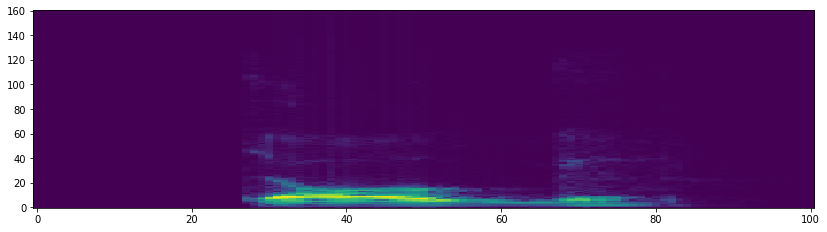

In [14]:
#audio/clip_17f8f3d23.wav "dog" confused as "go"
path=test_audio_path + "clip_17f8f3d23.wav"
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.imshow(np.squeeze(get_spect(path), axis=0) , aspect='auto', origin='lower')
ipd.Audio(path)

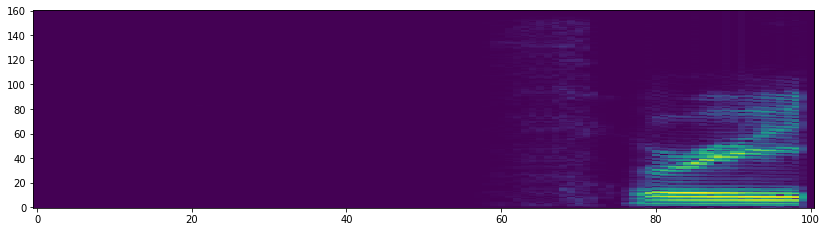

In [21]:
#"three" or "free", it even can't be identified by human beings
path=test_audio_path + "clip_50113e0c1.wav"
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.imshow(np.squeeze(get_spect(path), axis=0) , aspect='auto', origin='lower')
ipd.Audio(path)

<h2>Noisy</h2>

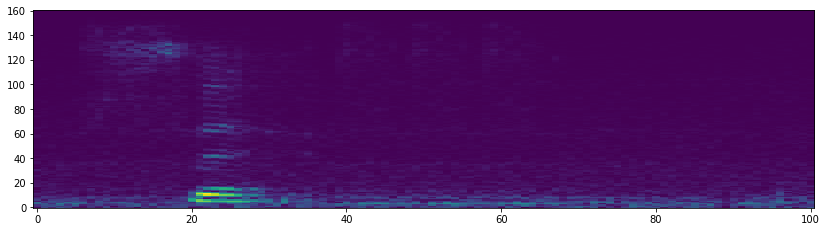

In [15]:
path = train_audio_path + "six/6301e683_nohash_1.wav"
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.imshow(np.squeeze(get_spect(path), axis=0) , aspect='auto', origin='lower')
ipd.Audio(path)

<h2>Silence</h2>

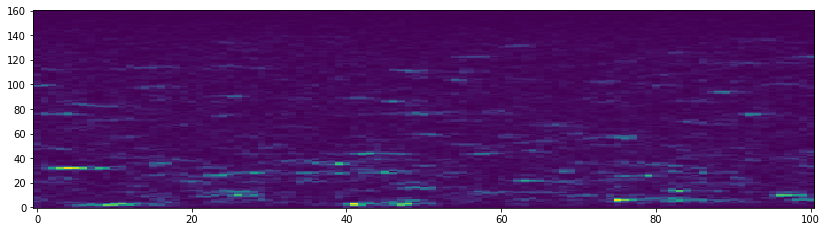

In [19]:
path = train_audio_path + "tree/ced835d3_nohash_0.wav"
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.imshow(np.squeeze(get_spect(path), axis=0) , aspect='auto', origin='lower')
ipd.Audio(path)

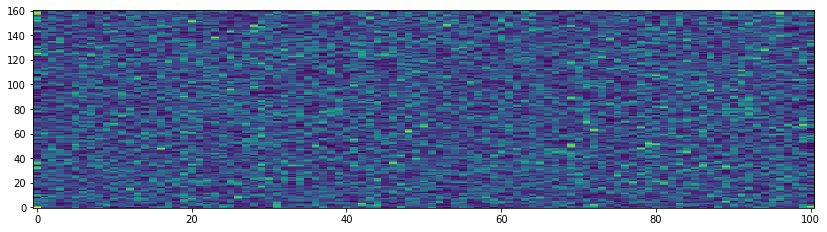

In [20]:
path=test_audio_path + "clip_e5248f48a.wav"
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.imshow(np.squeeze(get_spect(path), axis=0) , aspect='auto', origin='lower')
ipd.Audio(path)

<h2>Out of Training dataset</h2>

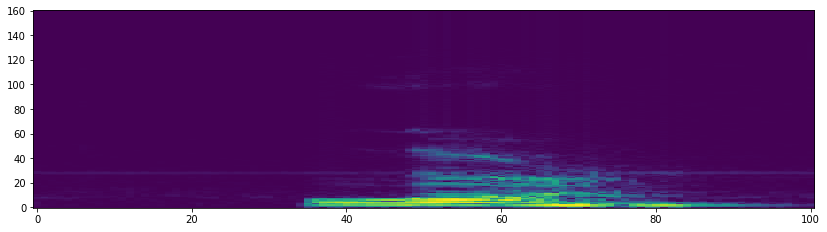

In [18]:
#"learn" ?
path = test_audio_path + "clip_3199e37e4.wav"
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.imshow(np.squeeze(get_spect(path), axis=0) , aspect='auto', origin='lower')
ipd.Audio(path)